# 1. Install and Import Dependencies

In [1]:
%pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


ERROR: Could not find a version that satisfies the requirement torch==1.8.1+cu111 (from versions: 1.11.0)
ERROR: No matching distribution found for torch==1.8.1+cu111
You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
!cd yolov5 & pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from pygame import mixer

C:\Users\Akin\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pygame 2.1.2 (SDL 2.0.18, Python 3.10.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


# 2. Load Model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Akin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-26 Python-3.10.2 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# 3. Make Detections with Images

In [4]:
img = 'https://assets-global.website-files.com/595d6b420002832258c527cb/618abc9cdfbae01bc36d2ce5_hero_advanced_drowsiness.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 1075x2000 1 person, 1 chair
Speed: 455.4ms pre-process, 154.6ms inference, 7.0ms NMS per image at shape (1, 3, 352, 640)


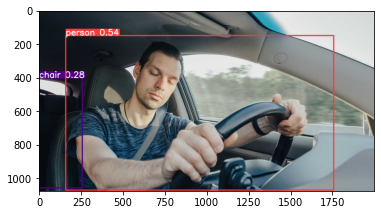

In [6]:
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
results.render()

[array([[[ 16,  23,  33],
         [ 16,  23,  33],
         [ 17,  24,  34],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        [[ 16,  23,  33],
         [ 16,  23,  33],
         [ 17,  24,  34],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        [[ 16,  23,  33],
         [ 16,  23,  33],
         [ 17,  24,  34],
         ...,
         [211, 215, 214],
         [211, 215, 214],
         [211, 215, 214]],
 
        ...,
 
        [[  7,  11,  14],
         [  7,  11,  14],
         [  7,  11,  14],
         ...,
         [142, 152, 161],
         [142, 152, 161],
         [142, 152, 161]],
 
        [[  7,  11,  14],
         [  7,  11,  14],
         [  7,  11,  14],
         ...,
         [142, 152, 161],
         [142, 152, 161],
         [142, 152, 161]],
 
        [[  7,  11,  14],
         [  7,  11,  14],
         [  7,  11,  14],
         ...,
         [142, 152, 161],
  

# 4. Real Time Detections

In [13]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# 5. Train from scratch

In [2]:
import uuid   # Unique identifier
import os
import time

In [9]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [23]:
cap = cv2.VideoCapture(0)
# Loop through labels
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5)
    
    # Loop through image range
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        # Webcam feed
        ret, frame = cap.read()
        
        # Naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        # Writes out image to file 
        cv2.imwrite(imgname, frame)
        
        # Render to the screen
        cv2.imshow('Image Collection', frame)
        
        # 2 second delay between captures
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [17]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.fb312bc7-d54b-11ec-90db-b025aa338983.jpg


In [30]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data\images\awake.a4c3ebd3-ce45-11ec-a3cf-b025aa338983.jpg
data\images\awake.a4c3ebd4-ce45-11ec-80ca-b025aa338983.jpg
data\images\awake.a4c3ebd5-ce45-11ec-8808-b025aa338983.jpg
data\images\awake.a4c3ebd6-ce45-11ec-9428-b025aa338983.jpg
data\images\awake.a4c3ebd7-ce45-11ec-870a-b025aa338983.jpg
data\images\awake.a4c3ebd8-ce45-11ec-b1f9-b025aa338983.jpg
data\images\awake.a4c3ebd9-ce45-11ec-9e8d-b025aa338983.jpg
data\images\awake.a4c3ebda-ce45-11ec-8c14-b025aa338983.jpg
data\images\awake.a4c3ebdb-ce45-11ec-afd4-b025aa338983.jpg
data\images\awake.a4c3ebdc-ce45-11ec-b7c1-b025aa338983.jpg
data\images\awake.a4c3ebdd-ce45-11ec-b332-b025aa338983.jpg
data\images\awake.a4c3ebde-ce45-11ec-8e17-b025aa338983.jpg
data\images\awake.a4c3ebdf-ce45-11ec-9257-b025aa338983.jpg
data\images\awake.a4c3ebe0-ce45-11ec-b797-b025aa338983.jpg
data\images\awake.a4c3ebe1-ce45-11ec-8942-b025aa338983.jpg
data\images\awake.a4c3ebe2-ce45-11ec-a38b-b025aa338983.jpg
data\images\awake.a4c3ebe3-ce45-11ec-a4b9-b025aa338983.j

In [31]:
!git clone https://github.com/tzutalin/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [32]:
%pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


'pyrcc5' is not recognized as an internal or external command,
operable program or batch file.


In [33]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   e305aba..d059d1d  master              -> origin/master
   8ddfd6a..152d964  classifier          -> origin/classifier
 * [new branch]      docker-m1           -> origin/docker-m1
   d4d688c..c58f17a  test/conv_reduction -> origin/test/conv_reduction
   b4f7fc5..f3e9621  test/convtranspose  -> origin/test/convtranspose
 * [new branch]      v7.0                -> origin/v7.0

# 6. Load Custom Model

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp16/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\Akin/.cache\torch\hub\master.zip
YOLOv5  2022-5-27 Python-3.10.2 torch-1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [4]:
img = os.path.join('data', 'images', 'awake.6b41c2f0-ce44-11ec-a7a8-b025aa338983.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 480x640 1 awake
Speed: 17.0ms pre-process, 232.4ms inference, 8.0ms NMS per image at shape (1, 3, 480, 640)


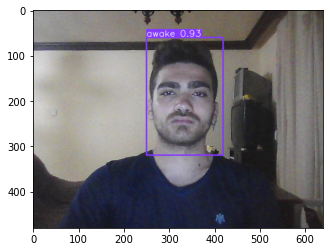

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [8]:
cap = cv2.VideoCapture("uykulu.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()